<div style="display: flex; align-items: center;">
    <h1 style="margin-right: 100px;">Modelos de Deep Learning con PyTorch</h1>
    <img src="https://raw.githubusercontent.com/JAIROX2004/CIMA/refs/heads/main/CIMA.jpg" alt="Logo" style="height: 180px;">
</div>

## Introducción:
[PyTorch](https://pytorch.org/features/) es un framework de deep learning ampliamente utilizado, conocido por su flexibilidad, facilidad de uso y capacidad para acelerar el desarrollo de modelos de aprendizaje profundo. Diseñado principalmente en Python, está estrechamente integrado con bibliotecas populares como NumPy, lo que facilita la manipulación de datos y la implementación de algoritmos complejos.

**Features:**

- Soporte para una amplia gama de modelos de aprendizaje profundo.
- Compatibilidad con las principales plataformas en la nube, lo que simplifica la implementación y el escalado.
- Habilidad para distribuir cálculos entre múltiples CPU y GPU, mejorando significativamente el rendimiento.
- Gran adopción en la investigación académica, respaldada por una comunidad activa y recursos constantes.

Fuente: [https://www.nvidia.com/en-au/glossary/pytorch/](https://www.nvidia.com/en-au/glossary/pytorch/)

## Objetivo:
El objetivo de este trabajo es ofrecer una guía práctica para construir modelos de deep learning utilizando PyTorch, desarrollando como caso de estudio la clasificación de dígitos en el dataset MNIST.

**Enlaces de interés:**
- [Redes Nueronales: Definición](https://aws.amazon.com/es/what-is/neural-network/)
- [Hyperparámetros en Redes Neuronales](https://blog.javierheras.website/hiperparametros-de-una-red-neuronal/)
- [Descenso de Gradiente](https://www.ibm.com/mx-es/topics/gradient-descent)
- [Backpropagation](https://www.youtube.com/watch?v=iOsR-EC9z6I)
- [A Step by Step Backpropagation Example](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Sesgo y Varianza](https://aprendeia.com/bias-y-varianza-en-machine-learning/)

## Caso: MNIST

MNIST es una base de datos de imágenes de dígitos escritos a mano. Es un conjunto de datos etiquetados que combina imágenes de números con el nombre del número respectivo. Es un conjunto de datos muy conocido utilizado en la etapa de aprendizaje y experimentación.

**Definiendo el Problema**

- La entrada a la Red Neuronal serán imágenes en escala de gris, de tamaño 28x28, que contendrán un dígito (entre 0 y 9) escrito a mano.
- Así que el dato predicho por la Red Neuronal será una cantidad numérica (entre 0 y 9) que debería coincidir con el dígito escrito en la imagen de entrada.

### Importando Dataset

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [2]:
train_data = MNIST(root = 'data', train = True, download = True, transform= ToTensor())
train_data.data.shape

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 508kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.75MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.82MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



torch.Size([60000, 28, 28])

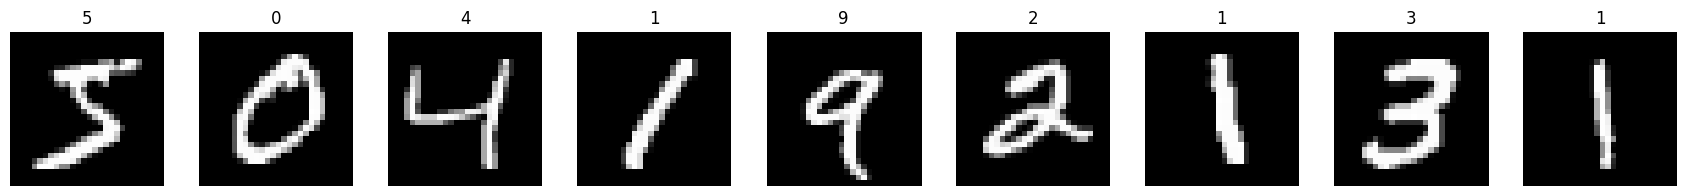

In [3]:
figure = plt.figure(figsize=(24, 2))

for i in range(9):
    img = train_data.data[i].numpy()
    label = train_data.targets[i].item()

    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap = 'gray')
    plt.title(f'{label}')
    plt.axis('off')

plt.show()

**Dataloader:**
- Un DataLoader en PyTorch es una herramienta que facilita el manejo de datos al entrenar modelos. Su propósito principal es dividir el conjunto de datos en lotes (o "mini-batches") y cargar cada lote en el modelo durante el entrenamiento o la evaluación. Esto permite procesar los datos en pequeñas porciones en lugar de cargar el conjunto completo a la vez, lo cual es más eficiente y menos demandante para la memoria.

- **`batch_size` grande:**
  - Mayor uso de memoria, gradientes más estables, entrenamiento más rápido
  pero puede afectar la generalización.

- **`batch_size` pequeño:**
  - Menor uso de memoria, más ruido en los gradientes, mejor generalización, pero entrenamiento más lento.

Una opción intermedia (como 32 o 64) suele ser un buen punto de partida en muchos casos. En general, probar diferentes tamaños y observar el rendimiento es una buena práctica, ya que el batch size óptimo puede variar según el modelo y los datos.




In [4]:
from torch.utils.data import DataLoader, random_split

In [5]:
train_size = int(0.8 * len(train_data))              # 80% para entrenamiento
val_size = int(0.1 * len(train_data))                # 10% para validación
test_size = len(train_data) - train_size - val_size  # 10% para prueba

train_data, val_data, test_data = random_split(train_data, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 32, shuffle = False)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)

En este punto, las imágenes en blanco y negro fueron convertidas a matrices, donde cada uno de los pixeles ocupa una posición en la matriz. La transformación `ToTensor()` en PyTorch convierte automáticamente los valores de los píxeles de las imágenes de 0 a 255 (escala típica en imágenes en escala de grises) a valores de punto flotante entre 0 y 1. Esto se hace dividiendo cada valor de píxel por 255.

Se dividió el conjunto de datos en entrenamiento, validación y prueba, y cada uno se pasará al modelo a travez del dataloader, el cual pasará grupos de 32 imágenes para entrenar el modelo.  

### Construcción del Modelo

Para este primer caso de estudio, no utilizaremos modelos complejos con arquitecturas de capas convolucionales u otros tipos avanzados de redes neuronales. En su lugar, emplearemos un perceptrón multicapa (MLP), también conocido como red neuronal feedforward, que es un tipo de modelo básico en deep learning.

Aunque el MLP no es tan efectivo como las redes convolucionales para el procesamiento de imágenes, es suficiente para nuestro propósito introductorio y nos permitirá entender los fundamentos del entrenamiento de modelos de deep learning.

Para este caso se implementará un **MLP** con:
- Una capa de entrada con 28*28 = 784 neuronas conectadas a una capa oculta con 64 neuronas.
- La capa oculta de 64 conecada a una segunda capa oculta con 15 neuronas.
- La capa de 15 neuronas conectada a una capa de salida con 10 neurodas, porque son 10 clases las que tenemos.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchsummary import summary

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Capa de entrada a capa oculta (784 -> 128)
        self.fc1 = nn.Linear(28 * 28, 64)
        # Capa oculta a capa oculta (128 -> 64)
        self.fc2 = nn.Linear(64, 15)
        # Capa oculta a capa de salida (64 -> 10)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))   # Activación ReLU después de la primera capa
        x = F.relu(self.fc2(x))   # Activación ReLU después de la segunda capa
        x = self.fc3(x)           # Capa de salida sin activación (se aplicará Softmax externamente si es necesario)
        return x

model = MLP()
model.to(device)
summary(model, input_size=(1, 28*28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          50,240
            Linear-2                   [-1, 15]             975
            Linear-3                   [-1, 10]             160
Total params: 51,375
Trainable params: 51,375
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


En pytorch, los modelos deben ser clases, heredadas de la clase `nn.Module` y debe contar como mínimo con 2 funciones:
- `__init__`: Contiene la estrucutra de la red neuronal. Aquí es donde especificas las capas que tendrá el modelo, como capas totalmente conectadas, convolucionales, de activación, de normalización, entre otras.
- `forward` : Define el flujo de datos a través de la red. En otras palabras, aquí especificas cómo deben pasar los datos a través de cada capa para producir una salida

En otras palabras, se está utilizando la función "relu" como función de activación de la primera y segunda capa oculta, mientras que para la tercera la dejamos sin activación para aplicar luego la que creamos conveniente.

### Funciones de Entrenamiento y Validación

In [9]:
def train_model(dataloader, model, criterion, optimizer, device):
  train_size = len(dataloader.dataset)
  nlotes = len(dataloader)

  model.train() #Indicarle a Pytorch que entrenaremos el modelo
  loss_train, acc = 0, 0

  for nlote, (images, labels) in enumerate(dataloader):
    images, labels = images.to(device), labels.to(device)

    logits = model(images) #Forward Propagation

    #Backward Propagation
    loss = criterion(logits, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_train = loss_train + loss.item()
    acc = acc + (logits.argmax(1) == labels).type(torch.float).sum().item()

    if nlote % 200 == 0:
      ndatos = nlote * len(images)
      print(f"loss: {loss.item():>7f}  [{ndatos:>5d}/{train_size:>5d}]")

  loss_train = loss_train / nlotes #Calculamos la pérdida promedio
  acc = acc / train_size #Calculamos el acc promedio

  print(f"\tacc/loss average:")
  print(f"\t\tEntrenamiento: Acc: {(100*acc):>0.4f}%\t-\tLoss: {loss_train:>8f}")
  return loss_train, acc

In [10]:
def eval_model(dataloader, model, criterion, device):
  val_size = len(dataloader.dataset)
  nlotes = len(dataloader)

  model.eval()
  loss_val, acc = 0, 0

  with torch.no_grad():
    for images, labels in dataloader:
      images, labels = images.to(device), labels.to(device)

      logits = model(images) #Predicciones (Propagación hacia adelante)

      loss_val = loss_val + criterion(logits, labels).item()
      acc = acc + (logits.argmax(1) == labels).type(torch.float).sum().item()

  loss_val = loss_val / nlotes #Calculamos la pérdida promedio
  acc = acc / val_size #Calculamos el acc promedio

  print(f"\t\tValidación: Acc: {(100*acc):>0.4f}%\t-\tLoss: {loss_val:>8f}")
  return loss_val, acc

### Configuración y Entrenamiento del Modelo


In [11]:
import torch.optim as optim

In [12]:
l_rate = 0.1
n_epoch = 10

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

fn_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.SGD(model.parameters(), lr = l_rate)

La cantidad de neuronas y capas ocultas utilizadas en el modelo, así como el learning rate, etc son hyperparámetros del modelo. Estos hyperparámetros, en este caso, fueron escogidos a criterio propio, y no representan necesariamente el mejor valor.

**¿Como determinamos los mejores hyperparámetros para el mdodelo?**
Existe una librería en python llamada "optuna" la cual nos ayuda a buscar los mejores valores para nuestros hyperparámetros en una región que nosotros especifiquemos. Esta librería tiene una excelente compatibilidad con pytorch.

In [13]:
for epoch in range(n_epoch):
  print(f"Epoch {epoch+1}\n---------------------------------------------------------------------")

  train_loss, train_acc = train_model(train_loader, model, fn_perdida, optimizador, device)
  train_losses.append(train_loss)
  train_accuracies.append(train_acc)

  val_loss, val_acc = eval_model(val_loader, model, fn_perdida, device)
  val_losses.append(val_loss)
  val_accuracies.append(val_acc)

print("Done!")

Epoch 1
---------------------------------------------------------------------
loss: 2.284648  [    0/48000]
loss: 0.728141  [ 6400/48000]
loss: 0.554230  [12800/48000]
loss: 0.656756  [19200/48000]
loss: 0.383483  [25600/48000]
loss: 0.434589  [32000/48000]
loss: 0.265805  [38400/48000]
loss: 0.060904  [44800/48000]
	acc/loss average:
		Entrenamiento: Acc: 85.1958%	-	Loss: 0.473007
		Validación: Acc: 93.2833%	-	Loss: 0.231422
Epoch 2
---------------------------------------------------------------------
loss: 0.274017  [    0/48000]
loss: 0.417896  [ 6400/48000]
loss: 0.145319  [12800/48000]
loss: 0.063200  [19200/48000]
loss: 0.035240  [25600/48000]
loss: 0.107279  [32000/48000]
loss: 0.205343  [38400/48000]
loss: 0.112494  [44800/48000]
	acc/loss average:
		Entrenamiento: Acc: 94.7042%	-	Loss: 0.176118
		Validación: Acc: 94.8333%	-	Loss: 0.169730
Epoch 3
---------------------------------------------------------------------
loss: 0.121833  [    0/48000]
loss: 0.250116  [ 6400/48000]
lo

Después de hacer una predicción, el modelo compara la salida con la etiqueta correcta y calcula la pérdida (error). Backpropagation calcula cómo este error cambia con respecto a cada peso en el modelo y "retropropaga" estos gradientes a través de las capas. Esto permite que el modelo "aprenda" de sus errores.

En cada iteración, los pesos se ajustan en la dirección opuesta al gradiente de la pérdida, usando una pequeña cantidad llamada learning rate. Esto mueve al modelo más cerca del mínimo de la función de pérdida.

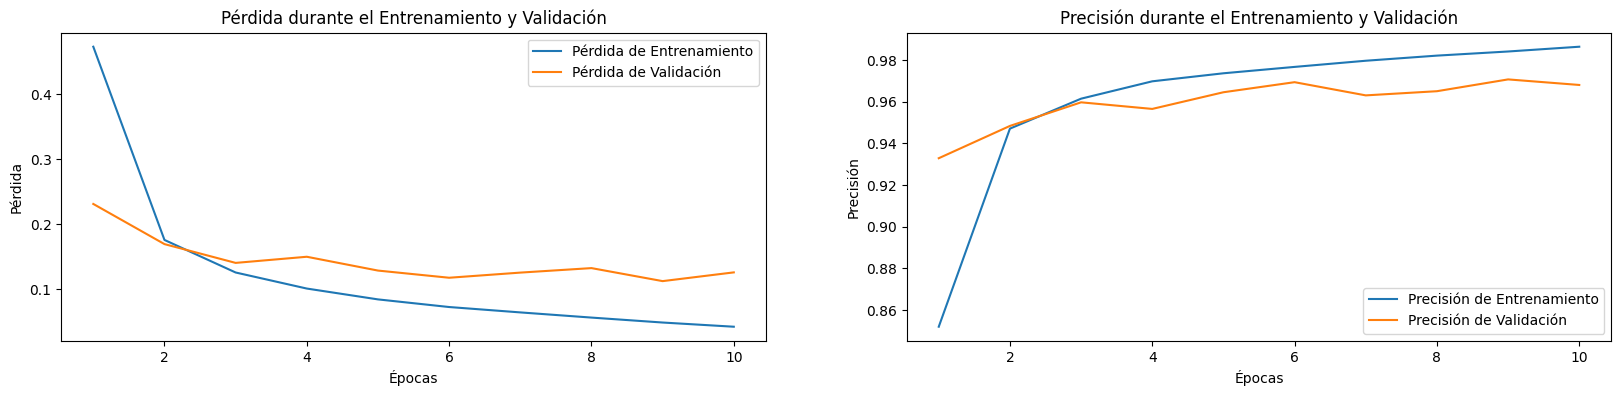

In [14]:
epochs_range = range(1, n_epoch + 1)

plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_losses, label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_accuracies, label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento y Validación')
plt.legend()

plt.show()

### Conclusiones
- Usar SGD con un learning rate de 0.1 parece efectivo para este modelo, ya que muestra una buena capacidad de aprendizaje.

- El comportamiento observado en los datos de validación (ligera estabilización/incremento en la pérdida) sugiere que podrías experimentar con técnicas como regularización (dropout, L2) o ajuste de hiperparámetros para mejorar la generalización.

- En general, el modelo está funcionando bien, con una alta precisión tanto en entrenamiento como en validación, lo que demuestra que tu configuración inicial es adecuada. Sin embargo, es importante monitorear el posible sobreajuste en aplicaciones prácticas.

### Próximos Pasos:

Este proyecto ha sido una introducción al deep learning usando un perceptrón multicapa. Para mejorar el rendimiento y explorar aplicaciones más complejas, se recomienda:
- Usar Capas Convolucionales.
- Probar Modelos Preentrenados como ResNet o EfficientNet
- Aplicar Técnicas de Regularización: Dropout y batch normalization para tratar el sobreajuste.
